In [19]:
import os
import numpy as np
from PIL import Image


In [20]:
train_path = 'C:\\Users\\fabio\\Desktop\\ML\\machine-learning-and-data-mining-csc735\\3rd-homework\\Animals_DataSet\\Training_Set'
validation_path = 'C:\\Users\\fabio\\Desktop\\ML\\machine-learning-and-data-mining-csc735\\3rd-homework\\Animals_DataSet\\Validation_Set'
test_path = 'C:\\Users\\fabio\\Desktop\\ML\\machine-learning-and-data-mining-csc735\\3rd-homework\\Animals_DataSet\\Test_Set'


In [21]:
def load_image(img_path):
    try:
        img = Image.open(img_path)  # Open the image
        img = img.convert('RGB')  # Ensure image is in RGB mode
        img = img.resize((32, 32))  # Resize to (32, 32)
        img_array = np.array(img)  # Convert to numpy array
        return img_array
        
    except Exception as e:
        print(f"Could not load image {img_path}: {e}")
        return None

def load_images_from_folder_with_labels(folder):
    images = []
    labels = []
    for label, subfolder in enumerate(os.listdir(folder)):
        subfolder_path = os.path.join(folder, subfolder)
        if not os.path.isdir(subfolder_path) or subfolder.startswith('.'):
            continue
        for filename in os.listdir(subfolder_path):
            if filename.startswith('.'):
                continue
            img_path = os.path.join(subfolder_path, filename)
            if img_path.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif', '.tiff')):
                img_array = load_image(img_path)
                if img_array is not None:
                    images.append(img_array)
                    labels.append(label)

    return np.array(images), np.array(labels)

# Load images from training, validation, and test sets
train_images, train_labels = load_images_from_folder_with_labels(train_path)
validation_images, validation_labels = load_images_from_folder_with_labels(validation_path)
test_images, test_labels = load_images_from_folder_with_labels(test_path)

# Print shapes of images
print("Train images shape:", train_images.shape)
print("Train labels shape:", train_labels.shape)
print("Validation images shape:", validation_images.shape)
print("Validation labels shape:", validation_labels.shape)
print("Test images shape:", test_images.shape)
print("Test labels shape:", test_labels.shape)


Train images shape: (4200, 32, 32, 3)
Train labels shape: (4200,)
Validation images shape: (1200, 32, 32, 3)
Validation labels shape: (1200,)
Test images shape: (600, 32, 32, 3)
Test labels shape: (600,)


In [22]:
import numpy as np
from keras.utils import to_categorical

# Check for unique labels before adjusting
print("Unique labels in train_labels before adjustment:", np.unique(train_labels))
print("Unique labels in validation_labels before adjustment:", np.unique(validation_labels))

# Subtract 1 from all labels to shift the range to [0, 5]
train_labels = train_labels - 1
validation_labels = validation_labels - 1

# Now check if the labels are in the valid range [0, 5]
print("Unique labels in train_labels after adjustment:", np.unique(train_labels))
print("Unique labels in validation_labels after adjustment:", np.unique(validation_labels))

# Apply one-hot encoding to the adjusted labels
train_labels = to_categorical(train_labels, num_classes=6)
validation_labels = to_categorical(validation_labels, num_classes=6)

# Check the shapes of the one-hot encoded labels
print("Train labels shape after one-hot encoding:", train_labels.shape)
print("Validation labels shape after one-hot encoding:", validation_labels.shape)

# Check the unique values in the one-hot encoded labels by checking the unique rows
unique_train_labels = np.unique(train_labels, axis=0)
unique_validation_labels = np.unique(validation_labels, axis=0)

print("Unique labels in train_labels after one-hot encoding:", unique_train_labels)
print("Unique labels in validation_labels after one-hot encoding:", unique_validation_labels)


Unique labels in train_labels before adjustment: [1 2 3 4 5 6]
Unique labels in validation_labels before adjustment: [1 2 3 4 5 6]
Unique labels in train_labels after adjustment: [0 1 2 3 4 5]
Unique labels in validation_labels after adjustment: [0 1 2 3 4 5]
Train labels shape after one-hot encoding: (4200, 6)
Validation labels shape after one-hot encoding: (1200, 6)
Unique labels in train_labels after one-hot encoding: [[0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]]
Unique labels in validation_labels after one-hot encoding: [[0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]]


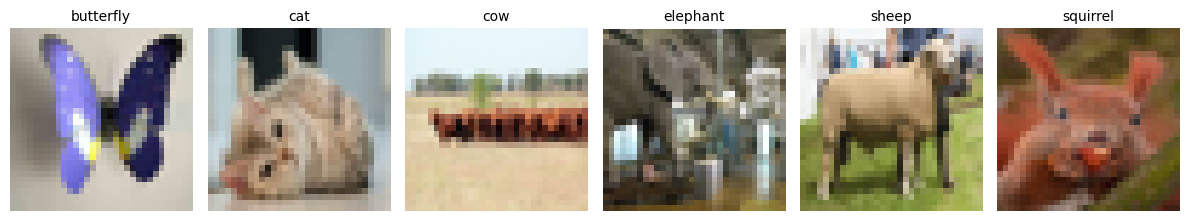

In [23]:
import matplotlib.pyplot as plt  # Ensure matplotlib is imported
%matplotlib inline

import numpy as np  # Ensure NumPy is imported

def show_one_image_per_class(images, labels, num_classes, class_names):
    # Dictionary to store one image per class
    class_images = {}

    # Loop over images and labels
    for img, label in zip(images, labels):
        # Extract the label index from the one-hot encoded label
        label_index = np.argmax(label)  # Get the index of the '1' in the one-hot encoding

        # Add the first image for each class
        if label_index not in class_images:
            class_images[label_index] = img
        if len(class_images) == num_classes:
            break

    # Display images
    plt.figure(figsize=(12, 6))
    for i, class_label in enumerate(sorted(class_images.keys())):
        plt.subplot(1, num_classes, i + 1)  # Use `i + 1` for the subplot index
        plt.imshow(class_images[class_label])
        plt.title(class_names[class_label], fontsize=10)  # Use label directly for class_names
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Assuming 6 classes in your dataset with these names
class_names = ["butterfly", "cat", "cow", "elephant", "sheep", "squirrel"]

# Show one image for each class in the training set
NUM_CLASSES = 6
show_one_image_per_class(train_images, train_labels, NUM_CLASSES, class_names)


In [24]:
from sklearn.preprocessing import StandardScaler

In [25]:
def normalize_images(images):
    return images / 255.0  # Normalize pixel values to [0, 1]

In [26]:
train_images_normalized = normalize_images(train_images)
validation_images_normalized = normalize_images(validation_images)
test_images_normalized = normalize_images(test_images)

In [27]:
def get_class_counts(data_dir):
    class_counts = {}
    for class_dir in os.listdir(data_dir):
        class_path = os.path.join(data_dir, class_dir)
        if os.path.isdir(class_path):
            class_counts[class_dir] = len(os.listdir(class_path))
    return class_counts


In [28]:
train_class_counts = get_class_counts(train_path)
validation_class_counts = get_class_counts(validation_path)

In [29]:
print("Train class counts:", train_class_counts)
print("Validation class counts:", validation_class_counts)
print("Class names:", class_names)


Train class counts: {'butterfly': 700, 'cat': 700, 'cow': 700, 'elephant': 700, 'sheep': 700, 'squirrel': 700}
Validation class counts: {'butterfly': 200, 'cat': 200, 'cow': 200, 'elephant': 200, 'sheep': 200, 'squirrel': 200}
Class names: ['butterfly', 'cat', 'cow', 'elephant', 'sheep', 'squirrel']


In [30]:
import matplotlib.pyplot as plt
import numpy as np

def plot_class_distribution(class_names, class_counts, dataset_name):
    
    # Map counts based on class names
    counts = [class_counts.get(name, 0) for name in class_names]
    
    # Bar width and positions
    bar_positions = np.arange(len(class_names))
    
    # Plotting
    plt.figure(figsize=(10, 6))
    bars = plt.bar(bar_positions, counts, color='skyblue', edgecolor='black')

    # Add labels, title, and grid
    plt.xlabel("Class Names")
    plt.ylabel("Number of Images")
    plt.title(f"{dataset_name} Class Distribution")
    plt.xticks(bar_positions, class_names, rotation=45, ha="right")
    plt.tight_layout()
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    # Adding legend
    legend_labels = [f"Class {i+1} ({name}: {counts[i]} images)" for i, name in enumerate(class_names)]
    plt.legend(bars, legend_labels, loc='upper right', title="Legend")
    
    # Show plot
    plt.show()


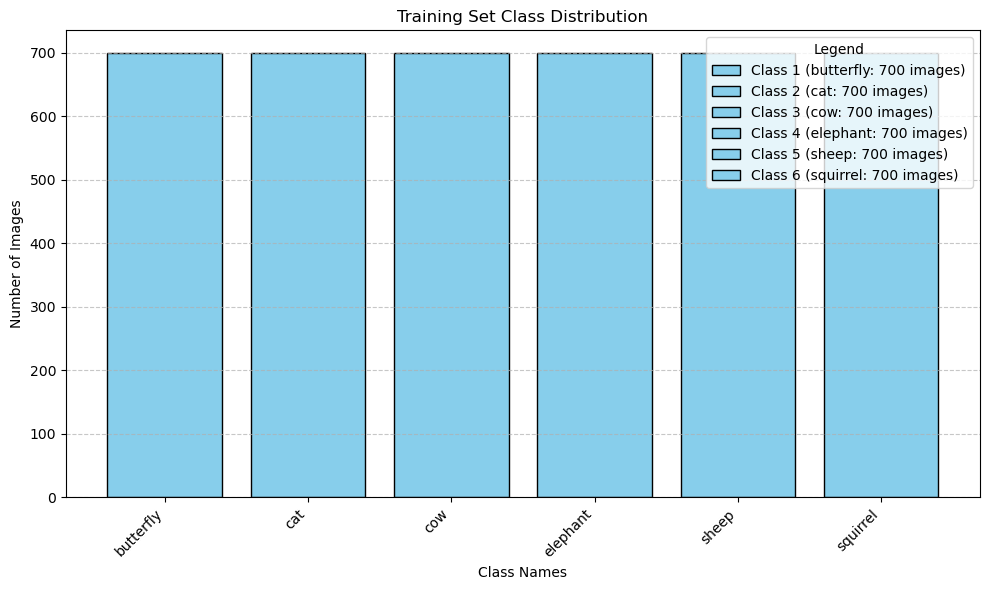

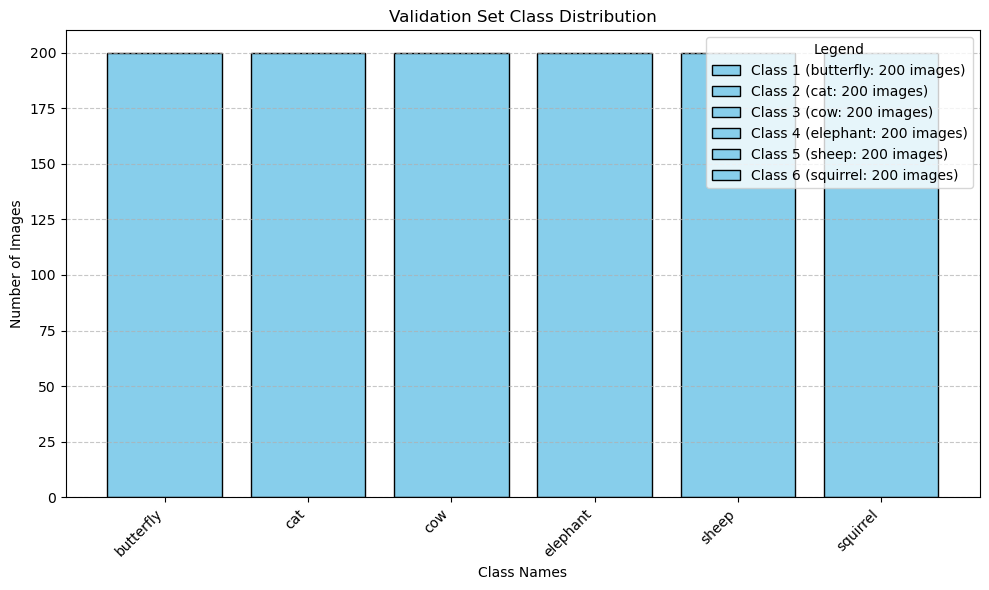

In [31]:
plot_class_distribution(class_names, train_class_counts, "Training Set")
plot_class_distribution(class_names, validation_class_counts, "Validation Set")


In [32]:
print(train_images.shape)
print(train_labels.shape)  # Should be (4200, 6)
print(validation_labels.shape)  # Should be (1200, 6)


(4200, 32, 32, 3)
(4200, 6)
(1200, 6)


In [33]:
# Check statistics of normalized validation images
print("Validation Data Stats (Normalized):")
print(f"Min: {np.min(validation_images_normalized)}")
print(f"Max: {np.max(validation_images_normalized)}")
print(f"Mean: {np.mean(validation_images_normalized)}")
print(f"Std: {np.std(validation_images_normalized)}")

# Check statistics of normalized training images
print("Train Data Stats (Normalized):")
print(f"Min: {np.min(train_images_normalized)}")
print(f"Max: {np.max(train_images_normalized)}")
print(f"Mean: {np.mean(train_images_normalized)}")
print(f"Std: {np.std(train_images_normalized)}")


Validation Data Stats (Normalized):
Min: 0.0
Max: 1.0
Mean: 0.46066427845009544
Std: 0.25417463680873464
Train Data Stats (Normalized):
Min: 0.0
Max: 1.0
Mean: 0.46114342004162784
Std: 0.25532166418343705


In [34]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1, 
    height_shift_range=0.1, 
    shear_range=0.1,  
    zoom_range=0.1,  
    horizontal_flip=True,
    fill_mode='nearest',
)
datagen.fit(train_images_normalized)

In [35]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam

# Define the CNN model
model_1 = models.Sequential()

# Add the first convolutional layer
model_1.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
model_1.add(layers.BatchNormalization())
model_1.add(layers.MaxPooling2D((2, 2)))

# Add the second convolutional layer
model_1.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model_1.add(layers.BatchNormalization())
model_1.add(layers.MaxPooling2D((2, 2)))

# Add the third convolutional layer
model_1.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
model_1.add(layers.BatchNormalization())
model_1.add(layers.MaxPooling2D((2, 2)))

# Add the fourth convolutional layer
model_1.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
model_1.add(layers.BatchNormalization())
model_1.add(layers.GlobalAveragePooling2D())  # Use GAP instead of Flatten

# Add a fully connected (dense) layer
model_1.add(layers.Dense(128, activation='relu'))
model_1.add(layers.Dropout(0.5))  # Add dropout for regularization

# Add the output layer
model_1.add(layers.Dense(6, activation='softmax'))

# Compile the model with a tuned learning rate
model_1.compile(optimizer=Adam(learning_rate=1e-4), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

# Print model summary
model_1.summary()

# Train the model

history_1 = model_1.fit(
    datagen.flow(train_images_normalized, train_labels, batch_size=32),
    epochs=25,  # Increase epochs for better convergence
    validation_data=(validation_images_normalized, validation_labels),
    shuffle=True,
)


C:\Users\fabio\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 4, 4, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 4, 4, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 256)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 6)              │           774 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 424,006 (1.62 MB)

 Trainable params: 423,046 (1.61 MB)

 Non-trainable params: 960 (3.75 KB)

Epoch 1/25


C:\Users\fabio\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


132/132 ━━━━━━━━━━━━━━━━━━━━ 11s 43ms/step - accuracy: 0.2985 - loss: 1.7064 - val_accuracy: 0.1967 - val_loss: 1.9344
Epoch 2/25
132/132 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - accuracy: 0.4632 - loss: 1.4064 - val_accuracy: 0.2400 - val_loss: 1.9672
Epoch 3/25
132/132 ━━━━━━━━━━━━━━━━━━━━ 5s 38ms/step - accuracy: 0.4935 - loss: 1.3022 - val_accuracy: 0.2850 - val_loss: 1.8200
Epoch 4/25
132/132 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - accuracy: 0.5216 - loss: 1.2465 - val_accuracy: 0.3817 - val_loss: 1.5197
Epoch 5/25
132/132 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - accuracy: 0.5368 - loss: 1.2151 - val_accuracy: 0.5342 - val_loss: 1.2330
Epoch 6/25
132/132 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - accuracy: 0.5564 - loss: 1.1442 - val_accuracy: 0.5167 - val_loss: 1.2509
Epoch 7/25
132/132 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - accuracy: 0.5773 - loss: 1.1167 - val_accuracy: 0.5092 - val_loss: 1.2833
Epoch 8/25
132/132 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - accuracy: 0.5989 - loss: 1.0729 - val_accuracy: 0.53

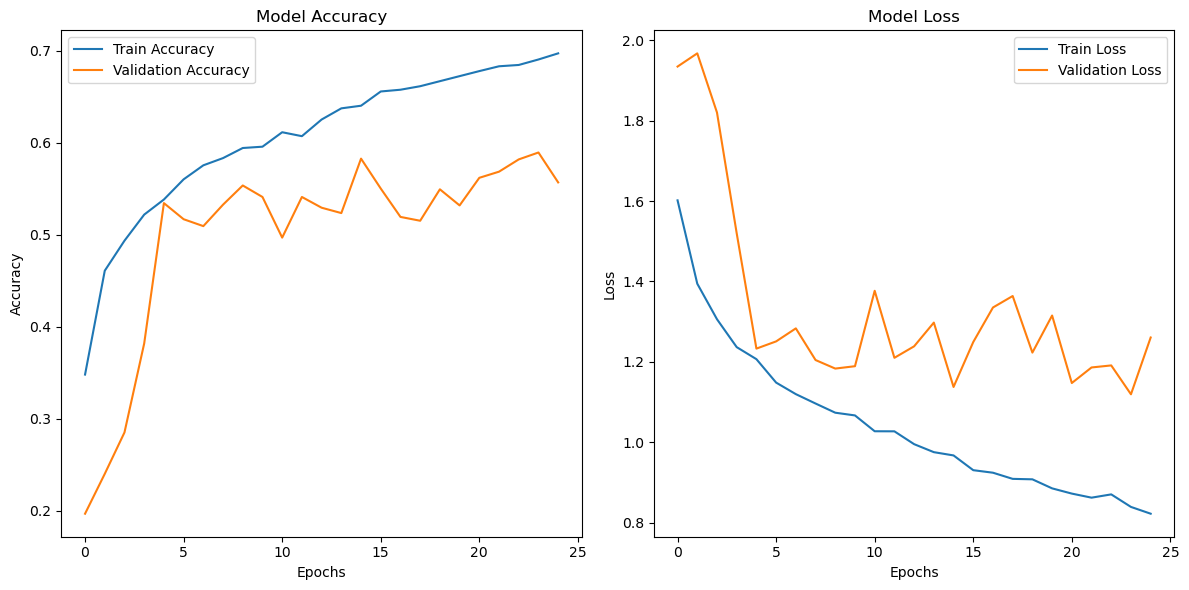

In [36]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))

# Accuracy Plot
plt.subplot(1, 2, 1)  # 1 row, 2 columns, first plot
plt.plot(history_1.history['accuracy'], label='Train Accuracy')
plt.plot(history_1.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss Plot
plt.subplot(1, 2, 2)  # 1 row, 2 columns, second plot
plt.plot(history_1.history['loss'], label='Train Loss')
plt.plot(history_1.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Show the plots
plt.tight_layout()
plt.show()


In [37]:
import tensorflow as tf
from tensorflow.keras import layers, models, regularizers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Define Updated Model 2
model_2 = models.Sequential()

# First Convolutional Layer with larger filters and Adam optimizer
model_2.add(layers.Conv2D(128, (5, 5), activation='linear', kernel_regularizer=regularizers.l2(0.001), input_shape=(32, 32, 3))) 
model_2.add(layers.LeakyReLU(alpha=0.1))
model_2.add(layers.BatchNormalization())
model_2.add(layers.MaxPooling2D((2, 2)))

# Second Convolutional Layer
model_2.add(layers.Conv2D(256, (3, 3), activation='linear', kernel_regularizer=regularizers.l2(0.001)))
model_2.add(layers.LeakyReLU(alpha=0.1))
model_2.add(layers.BatchNormalization())
model_2.add(layers.MaxPooling2D((2, 2)))

# Third Convolutional Layer with more filters
model_2.add(layers.Conv2D(256, (3, 3), activation='linear', kernel_regularizer=regularizers.l2(0.001)))
model_2.add(layers.LeakyReLU(alpha=0.1))
model_2.add(layers.BatchNormalization())
model_2.add(layers.MaxPooling2D((2, 2)))

# Add a global average pooling layer
model_2.add(layers.GlobalAveragePooling2D())

# Fully Connected Layer with increased neurons
model_2.add(layers.Dense(512, activation='linear', kernel_regularizer=regularizers.l2(0.001)))
model_2.add(layers.LeakyReLU(alpha=0.1))  # Leaky ReLU
model_2.add(layers.Dropout(0.3))  # Reduced dropout rate

# Output layer
model_2.add(layers.Dense(6, activation='softmax'))  # Assuming 6 classes

# Compile the model with Adam optimizer
model_2.compile(optimizer=Adam(learning_rate=1e-3),  # Using Adam with a higher learning rate
                        loss='categorical_crossentropy',
                        metrics=['accuracy'])

# Print the model summary
model_2.summary()

# Define callbacks for better training control
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, min_lr=1e-6)

# Train the model
history_2 = model_2.fit(
    datagen.flow(train_images_normalized, train_labels, batch_size=32),
    epochs=25,
    validation_data=(validation_images_normalized, validation_labels),
    shuffle=True,
    callbacks=[early_stopping, reduce_lr]
)


C:\Users\fabio\anaconda3\Lib\site-packages\keras\src\layers\activations\leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 28, 28, 128)    │         9,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu (LeakyReLU)         │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 28, 28, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 12, 12, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_1 (LeakyReLU)       │ (None, 12, 12, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 12, 12, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 4, 4, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_2 (LeakyReLU)       │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 4, 4, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 2, 2, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 256)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_3 (LeakyReLU)       │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 6)              │         3,078 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,032,198 (3.94 MB)

 Trainable params: 1,030,918 (3.93 MB)

 Non-trainable params: 1,280 (5.00 KB)

Epoch 1/25
132/132 ━━━━━━━━━━━━━━━━━━━━ 17s 87ms/step - accuracy: 0.3202 - loss: 2.6088 - val_accuracy: 0.2417 - val_loss: 2.7871 - learning_rate: 0.0010
Epoch 2/25
132/132 ━━━━━━━━━━━━━━━━━━━━ 10s 79ms/step - accuracy: 0.4306 - loss: 2.1648 - val_accuracy: 0.2942 - val_loss: 2.8441 - learning_rate: 0.0010
Epoch 3/25
132/132 ━━━━━━━━━━━━━━━━━━━━ 11s 81ms/step - accuracy: 0.4903 - loss: 1.9285 - val_accuracy: 0.3917 - val_loss: 2.1021 - learning_rate: 0.0010
Epoch 4/25
132/132 ━━━━━━━━━━━━━━━━━━━━ 10s 78ms/step - accuracy: 0.5236 - loss: 1.7959 - val_accuracy: 0.3217 - val_loss: 2.1727 - learning_rate: 0.0010
Epoch 5/25
132/132 ━━━━━━━━━━━━━━━━━━━━ 10s 79ms/step - accuracy: 0.5334 - loss: 1.6970 - val_accuracy: 0.2667 - val_loss: 2.9015 - learning_rate: 0.0010
Epoch 6/25
132/132 ━━━━━━━━━━━━━━━━━━━━ 11s 87ms/step - accuracy: 0.5792 - loss: 1.5634 - val_accuracy: 0.4700 - val_loss: 1.8167 - learning_rate: 5.0000e-04
Epoch 7/25
132/132 ━━━━━━━━━━━━━━━━━━━━ 11s 83ms/step - accuracy: 0.5858

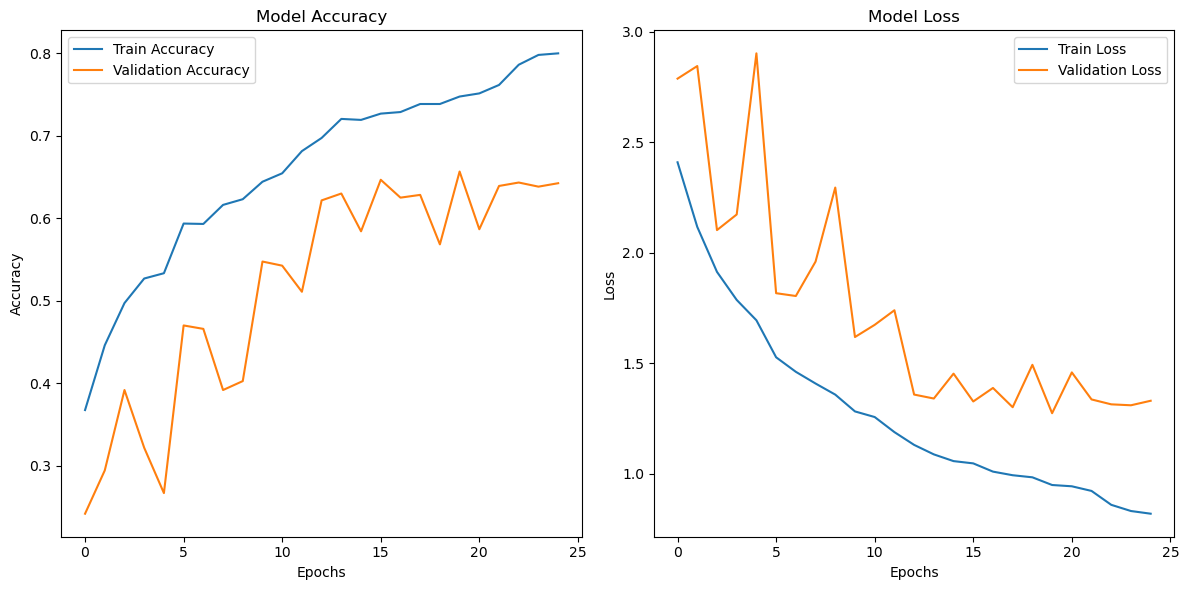

In [38]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))

# Accuracy Plot
plt.subplot(1, 2, 1)  # 1 row, 2 columns, first plot
plt.plot(history_2.history['accuracy'], label='Train Accuracy')
plt.plot(history_2.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss Plot
plt.subplot(1, 2, 2)  # 1 row, 2 columns, second plot
plt.plot(history_2.history['loss'], label='Train Loss')
plt.plot(history_2.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Show the plots
plt.tight_layout()
plt.show()


In [39]:
import tensorflow as tf
from tensorflow.keras import layers, models, regularizers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Define Model 3 - Updated Architecture
model_3 = models.Sequential()

# First Convolutional Layer
model_3.add(layers.Conv2D(64, (3, 3), strides=(1, 1), activation='relu', kernel_regularizer=regularizers.l2(0.01), padding='same', input_shape=(32, 32, 3)))
model_3.add(layers.BatchNormalization())
model_3.add(layers.MaxPooling2D((2, 2)))

# Second Convolutional Layer
model_3.add(layers.Conv2D(128, (3, 3), strides=(1, 1), activation='relu', kernel_regularizer=regularizers.l2(0.01), padding='same'))
model_3.add(layers.BatchNormalization())
model_3.add(layers.MaxPooling2D((2, 2)))

# Third Convolutional Layer
model_3.add(layers.Conv2D(256, (3, 3), strides=(1, 1), activation='relu', kernel_regularizer=regularizers.l2(0.01), padding='same'))
model_3.add(layers.BatchNormalization())
model_3.add(layers.MaxPooling2D((2, 2)))

# Fourth Convolutional Layer
model_3.add(layers.Conv2D(512, (3, 3), strides=(1, 1), activation='relu', kernel_regularizer=regularizers.l2(0.01), padding='same'))
model_3.add(layers.BatchNormalization())

# Global Average Pooling Layer
model_3.add(layers.GlobalAveragePooling2D())

# Fully Connected (Dense) Layer
model_3.add(layers.Dense(256, activation='relu'))
model_3.add(layers.Dropout(0.6))  # Increased dropout to 0.6

# Output Layer
model_3.add(layers.Dense(6, activation='softmax'))  # Assuming 6 classes

# Compile the model
model_3.compile(optimizer=Adam(learning_rate=1e-3),  # Higher initial learning rate
                          loss='categorical_crossentropy',
                          metrics=['accuracy'])

# Print model summary
model_3.summary()

# Define callbacks for better training control
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, min_lr=1e-6)

# Data Augmentation
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Train the model
history_3 = model_3.fit(
    datagen.flow(train_images_normalized, train_labels, batch_size=32),
    epochs=25,  # Set to 25 epochs
    validation_data=(validation_images_normalized, validation_labels),
    shuffle=True,
    callbacks=[early_stopping, reduce_lr]
)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_7 (Conv2D)               │ (None, 32, 32, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 32, 32, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 16, 16, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 16, 16, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 8, 8, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 8, 8, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 4, 4, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 4, 4, 512)      │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_2      │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 6)              │         1,542 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,687,686 (6.44 MB)

 Trainable params: 1,685,766 (6.43 MB)

 Non-trainable params: 1,920 (7.50 KB)

Epoch 1/25
132/132 ━━━━━━━━━━━━━━━━━━━━ 17s 83ms/step - accuracy: 0.2883 - loss: 7.2211 - val_accuracy: 0.1667 - val_loss: 4.6487 - learning_rate: 0.0010
Epoch 2/25
132/132 ━━━━━━━━━━━━━━━━━━━━ 10s 79ms/step - accuracy: 0.4071 - loss: 3.4222 - val_accuracy: 0.2433 - val_loss: 3.3622 - learning_rate: 0.0010
Epoch 3/25
132/132 ━━━━━━━━━━━━━━━━━━━━ 10s 78ms/step - accuracy: 0.4384 - loss: 2.1983 - val_accuracy: 0.2175 - val_loss: 2.7864 - learning_rate: 0.0010
Epoch 4/25
132/132 ━━━━━━━━━━━━━━━━━━━━ 10s 79ms/step - accuracy: 0.4653 - loss: 1.8710 - val_accuracy: 0.2808 - val_loss: 2.1718 - learning_rate: 0.0010
Epoch 5/25
132/132 ━━━━━━━━━━━━━━━━━━━━ 10s 75ms/step - accuracy: 0.4912 - loss: 1.7831 - val_accuracy: 0.3075 - val_loss: 2.4298 - learning_rate: 0.0010
Epoch 6/25
132/132 ━━━━━━━━━━━━━━━━━━━━ 10s 78ms/step - accuracy: 0.4872 - loss: 1.7719 - val_accuracy: 0.3733 - val_loss: 2.0559 - learning_rate: 0.0010
Epoch 7/25
132/132 ━━━━━━━━━━━━━━━━━━━━ 10s 78ms/step - accuracy: 0.5133 - l

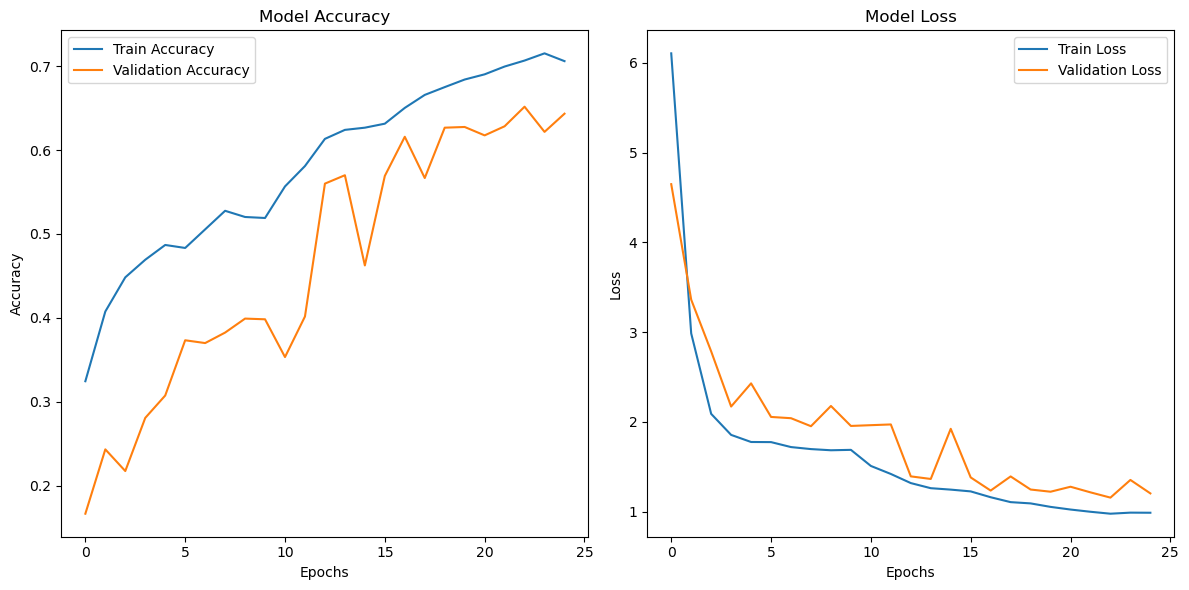

In [40]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))

# Accuracy Plot
plt.subplot(1, 2, 1)  # 1 row, 2 columns, first plot
plt.plot(history_3.history['accuracy'], label='Train Accuracy')
plt.plot(history_3.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss Plot
plt.subplot(1, 2, 2)  # 1 row, 2 columns, second plot
plt.plot(history_3.history['loss'], label='Train Loss')
plt.plot(history_3.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Show the plots
plt.tight_layout()
plt.show()


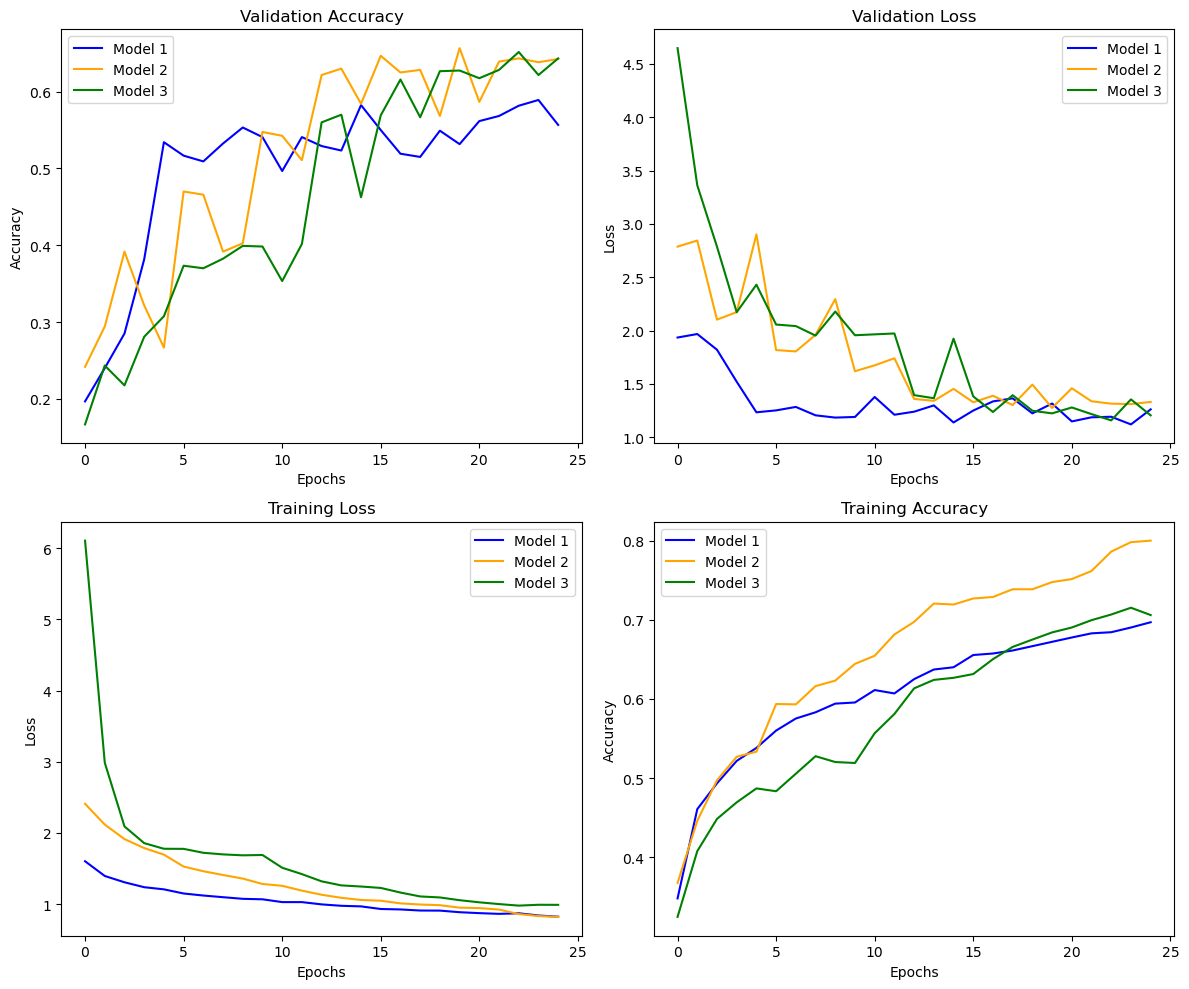

In [47]:
import matplotlib.pyplot as plt

# Extract the relevant data from each history object
val_accuracy_1 = history_1.history['val_accuracy']
val_accuracy_2 = history_2.history['val_accuracy']
val_accuracy_3 = history_3.history['val_accuracy']

val_loss_1 = history_1.history['val_loss']
val_loss_2 = history_2.history['val_loss']
val_loss_3 = history_3.history['val_loss']

loss_1 = history_1.history['loss']
loss_2 = history_2.history['loss']
loss_3 = history_3.history['loss']

accuracy_1 = history_1.history['accuracy']
accuracy_2 = history_2.history['accuracy']
accuracy_3 = history_3.history['accuracy']


# Create subplots for the 4 graphs
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Plot validation accuracy for all three models
axs[0, 0].plot(val_accuracy_1, label='Model 1', color='blue')
axs[0, 0].plot(val_accuracy_2, label='Model 2', color='orange')
axs[0, 0].plot(val_accuracy_3, label='Model 3', color='green')
axs[0, 0].set_title('Validation Accuracy')
axs[0, 0].set_xlabel('Epochs')
axs[0, 0].set_ylabel('Accuracy')
axs[0, 0].legend()

# Plot validation loss for all three models
axs[0, 1].plot(val_loss_1, label='Model 1', color='blue')
axs[0, 1].plot(val_loss_2, label='Model 2', color='orange')
axs[0, 1].plot(val_loss_3, label='Model 3', color='green')
axs[0, 1].set_title('Validation Loss')
axs[0, 1].set_xlabel('Epochs')
axs[0, 1].set_ylabel('Loss')
axs[0, 1].legend()

# Plot training loss for all three models
axs[1, 0].plot(loss_1, label='Model 1', color='blue')
axs[1, 0].plot(loss_2, label='Model 2', color='orange')
axs[1, 0].plot(loss_3, label='Model 3', color='green')
axs[1, 0].set_title('Training Loss')
axs[1, 0].set_xlabel('Epochs')
axs[1, 0].set_ylabel('Loss')
axs[1, 0].legend()

# Plot validation accuracy for all three models (same as first graph)
axs[1, 1].plot(accuracy_1, label='Model 1', color='blue')
axs[1, 1].plot(accuracy_2, label='Model 2', color='orange')
axs[1, 1].plot(accuracy_3, label='Model 3', color='green')
axs[1, 1].set_title('Training Accuracy')
axs[1, 1].set_xlabel('Epochs')
axs[1, 1].set_ylabel('Accuracy')
axs[1, 1].legend()

# Adjust layout
plt.tight_layout()
plt.show()
